In [1]:
import xarray as xr

import easygems.healpix as egh

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
ds = xr.open_zarr('https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/SAmer_km4p4_RAL3P3.n1280_GAL9_nest/dev/data.2d.v1.z10.zarr')

In [3]:
ds.isel(time=0).psl.mean().compute()

<xarray.DataArray 'psl' ()> Size: 4B
array(101185.984, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2020-01-20

In [6]:
crs = xr.DataArray(
    name="crs",
    attrs={
        "grid_mapping_name": "healpix",
        "healpix_nside": 2**10,
        "healpix_order": "nest",
    },
)

In [7]:
ds = ds.assign_coords(crs=crs)

<Figure size 640x480 with 0 Axes>

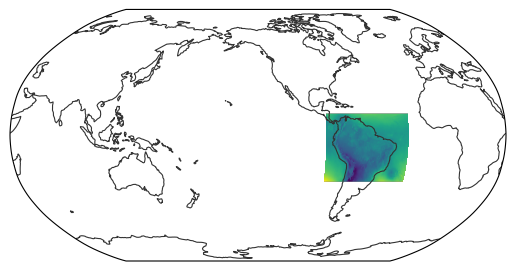

In [11]:
egh.healpix_show(ds.isel(time=24).psl)

In [5]:
import sys
sys.path.insert(0, '/home/users/mmuetz/deploy/wcrp_hackathon/scripts/convert_latlon_pp_to_hp_nc')
sys.path.insert(0, '/home/users/mmuetz/deploy/global_hackathon_tools/dataset_transforms')

In [6]:
import um_latlon_pp_to_healpix_nc as umh

In [7]:
import iris
import xarray

In [8]:
#path = '/gws/nopw/j04/kscale/DYAMOND3_example_data/sample_data_hirerarchy/10km-GAL9-nest/SAmer_km4p4_RAL3P3/field.pp/apvera.pp/SAmer_km4p4_RAL3P3.n1280_GAL9_nest.apvera_20200120T00.pp'
#cube = iris.load(path).extract_cube('air_temperature')

Coordinates:
  * cell     (cell) int64 25MB 3145728 3145729 3145730 ... 12582910 12582911
  * time     (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01

In [11]:
hp_lon, hp_lat, ichunk = umh.get_limited_healpix(extent, 10, 4**10)

In [12]:
hp_lon

array([315.        , 315.04394531, 314.95605469, ..., 315.04394531,
       314.95605469, 315.        ])

In [14]:
import numpy as np
da = xr.DataArray(np.ones(len(ichunk)), coords={'cell': ichunk})

ValueError: nside must be a positive integer 1 <= nside <= 2^29

<Figure size 640x480 with 0 Axes>

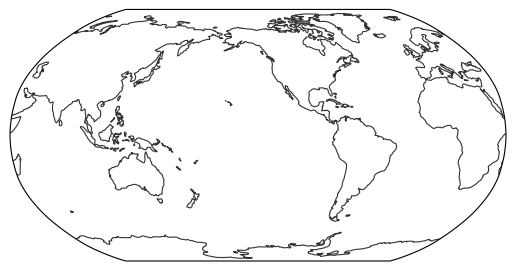

In [15]:
egh.healpix_show(da)

In [17]:
psl = ds.isel(time=0).psl

In [18]:
psl

<xarray.DataArray 'psl' (cell: 3145728)> Size: 13MB
dask.array<getitem, shape=(3145728,), dtype=float32, chunksize=(1048576,), chunktype=numpy.ndarray>
Coordinates:
  * cell     (cell) int64 25MB 3145728 3145729 3145730 ... 12582910 12582911
    time     datetime64[ns] 8B 2020-01-20
Attributes:
    STASH:          [1, 16, 222]
    UM_name:        air_pressure_at_sea_level
    grid_mapping:   healpix_nested
    healpix_zoom:   10
    long_name:      air_pressure_at_mean_sea_level
    source:         Data from Met Office Unified Model
    standard_name:  air_pressure_at_sea_level
    um_version:     13.5
    units:          Pa

In [19]:
da

<xarray.DataArray (cell: 4194304)> Size: 34MB
array([1., 1., 1., ..., 1., 1., 1.])
Coordinates:
  * cell     (cell) int64 34MB 3145728 3145729 3145730 ... 12582910 12582911